### Paquetes necesarios

In [24]:
import cv2  
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

TAREA: Realiza la cuenta de píxeles blancos por filas (en lugar de por columnas). Determina el valor máximo de píxeles blancos para filas, maxfil, mostrando el número de filas y sus respectivas posiciones, con un número de píxeles blancos mayor o igual que 0.90*maxfil.

(0.0, 512.0)

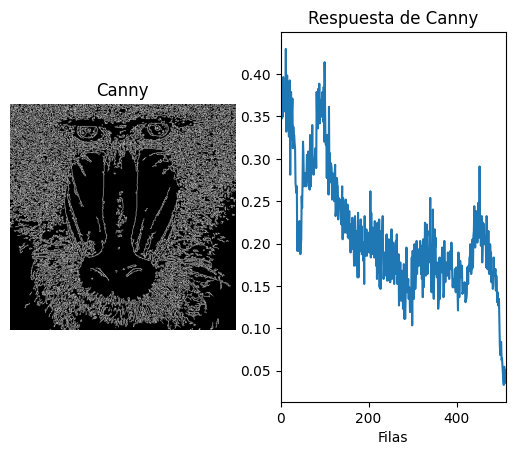

In [25]:
# Leemos la imagen, la convertimos a gris y aplicamos Canny para detectar bordes
img = cv2.imread('mandril.jpg')
gris = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
canny = cv2.Canny(gris, 100, 200)

mandril_rotado = cv2.rotate(canny, cv2.ROTATE_90_COUNTERCLOCKWISE)

# Si lo queremos hacer sin rotar la imagen, habría que cambiar 
col_counts = cv2.reduce(mandril_rotado, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

cols = col_counts[0] / (255 * mandril_rotado.shape[0])

#Muestra dicha cuenta gráficamente
plt.figure()
plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Canny")
plt.imshow(canny, cmap='gray') 

plt.subplot(1, 2, 2)
plt.title("Respuesta de Canny")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(cols)

#Rango en x definido por las columnas
plt.xlim([0, mandril_rotado.shape[1]])

TAREA: Aplica umbralizado a la imagen resultante de Sobel (convertida a 8 bits), y posteriormente realiza el conteo por filas y columnas similar al realizado en el ejemplo con la salida de Canny de píxeles no nulos. Calcula el valor máximo de la cuenta por filas y columnas, y determina las filas y columnas por encima del 0.90*máximo. Remarca con alguna primitiva gráfica dichas filas y columnas sobre la imagen del mandril. ¿Cómo se comparan los resultados obtenidos a partir de Sobel y Canny?

Máximo por columnas: 0.349609375
Columnas significativas (≥90% del máximo): [288]


(0.0, 512.0)

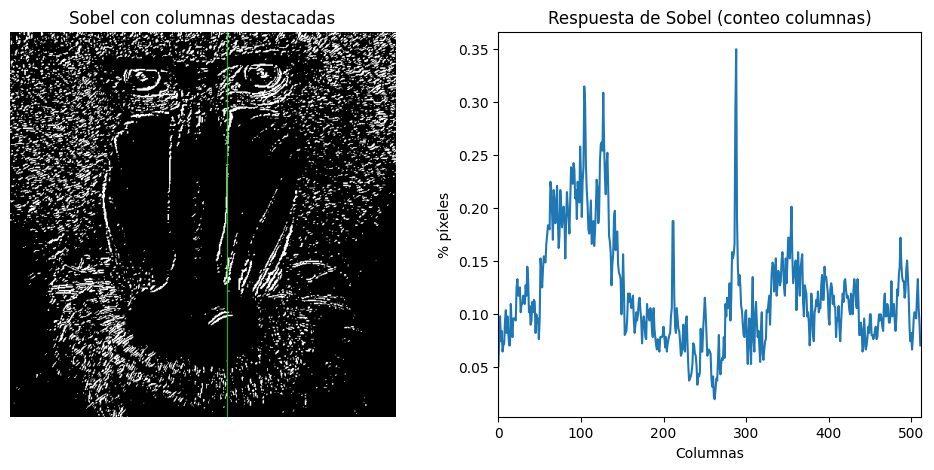

In [26]:
# Gaussiana para suavizar la imagen original, eliminando altas frecuencias
ggris = cv2.GaussianBlur(gris, (3, 3), 0)

#Calcula en ambas direcciones (horizontal y vertical)
sobelx = cv2.Sobel(ggris, cv2.CV_64F, 1, 0)  # x
sobely = cv2.Sobel(ggris, cv2.CV_64F, 0, 1)  # y
#Combina ambos resultados
sobel = cv2.add(sobelx, sobely)

#Define valor umbral
valorUmbral = 130 
#Obtiene imagen umbralizada para dicho valor definido
_, imagenUmbralizada = cv2.threshold(cv2.convertScaleAbs(sobel), valorUmbral, 255, cv2.THRESH_BINARY)

#Suma los valores de los pixeles por columna
col_counts = cv2.reduce(imagenUmbralizada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

#Normaliza en base al número de filas, primer valor devuelto por shape, y al valor máximo del píxel (255)
#El resultado será el número de píxeles blancos por columna
cols = col_counts[0] / (255 * imagenUmbralizada.shape[0])

# Identifica las columnas significativas (≥90% del máximo)
maxfil = np.max(cols)
cols_significativas = np.where(cols >= 0.9 * maxfil)[0]

# Mostrar información
print("Máximo por columnas:", maxfil)
print("Columnas significativas (≥90% del máximo):", cols_significativas)

# Copia de la imagen original para dibujar
img_con_columnas = cv2.cvtColor(imagenUmbralizada.copy(), cv2.COLOR_GRAY2BGR)

# Dibujar líneas verdes en las columnas significativas
for c in cols_significativas:
    cv2.line(img_con_columnas, (c, 0), (c, img_con_columnas.shape[0]), (0, 255, 0), 1)

# Mostrar resultados
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Sobel con columnas destacadas")
plt.imshow(cv2.cvtColor(img_con_columnas, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Respuesta de Sobel (conteo columnas)")
plt.xlabel("Columnas")
plt.ylabel("% píxeles")
plt.plot(cols)

plt.xlim([0, imagenUmbralizada.shape[1]])




Máximo por filas: 0.314453125
Filas significativas (≥90% del máximo): [ 3  4 20 51 81 82 83]


(0.0, 512.0)

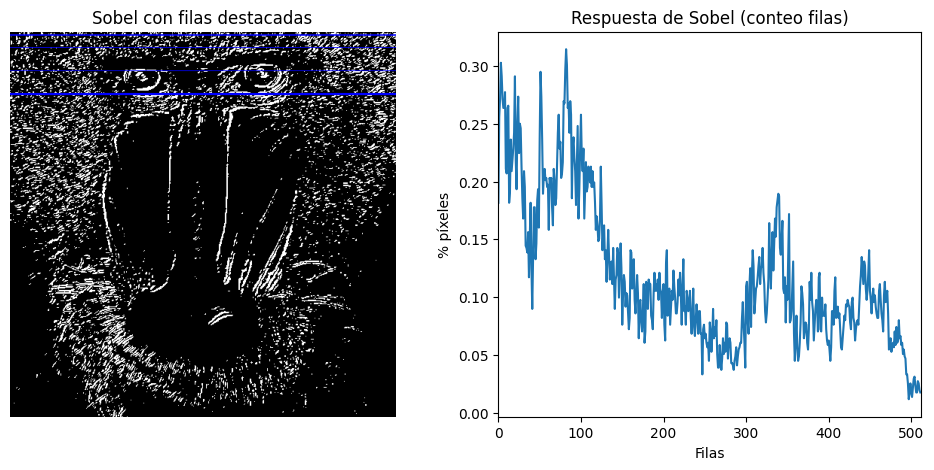

In [27]:
# Se rotará la imagen umbralizada para hacer la suma por filas
imagenUmbralizada_rotada = cv2.rotate(imagenUmbralizada, cv2.ROTATE_90_COUNTERCLOCKWISE)

# Suma los valores de los pixeles por columnas en la imagen rotada que equivalen a filas en la original
col_counts = cv2.reduce(imagenUmbralizada_rotada, 0, cv2.REDUCE_SUM, dtype=cv2.CV_32SC1)

# Normaliza en base al número de columnas, primer valor devuelto por shape, y al valor máximo del píxel (255)
cols = col_counts[0] / (255 * mandril_rotado.shape[1])

# Identifica las filas significativas (≥90% del máximo)
maxfil = np.max(cols)
filas_significativas = np.where(cols >= 0.9 * maxfil)[0]

# Mostrar información
print("Máximo por filas:", maxfil)
print("Filas significativas (≥90% del máximo):", filas_significativas)

# Copia de la imagen original para dibujar
img_con_filas = cv2.cvtColor(imagenUmbralizada.copy(), cv2.COLOR_GRAY2BGR)

# Dibujar líneas azules en las columnas significativas
for f in filas_significativas:
    cv2.line(img_con_filas, (0, f), (img_con_filas.shape[1], f), (255, 0, 0), 1)

# Mostrar resultados
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.axis("off")
plt.title("Sobel con filas destacadas")
plt.imshow(cv2.cvtColor(img_con_filas, cv2.COLOR_BGR2RGB))

plt.subplot(1, 2, 2)
plt.title("Respuesta de Sobel (conteo filas)")
plt.xlabel("Filas")
plt.ylabel("% píxeles")
plt.plot(cols)

plt.xlim([0, imagenUmbralizada.shape[0]])



TAREA: Tras ver los vídeos [My little piece of privacy](https://www.niklasroy.com/project/88/my-little-piece-of-privacy), [Messa di voce](https://youtu.be/GfoqiyB1ndE?feature=shared) y [Virtual air guitar](https://youtu.be/FIAmyoEpV5c?feature=shared) proponer un demostrador reinterpretando la parte de procesamiento de la imagen, tomando como punto de partida alguna de dichas instalaciones.

In [ ]:
import cv2
import numpy as np

# Inicializar cámara
vid = cv2.VideoCapture(0)
if not vid.isOpened():
    raise IOError("No se puede abrir la cámara")

while True:
    ret, frame = vid.read()
    if not ret:
        break

    frame = cv2.flip(frame, 1)  # Espejo
    hsvFrame = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Rango amarillo y creación de máscara
    lower_yellow = np.array([20, 100, 100])
    upper_yellow = np.array([30, 255, 255])
    mask = cv2.inRange(hsvFrame, lower_yellow, upper_yellow)

    # Encontrar contornos
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Filtrar contornos grandes
    large_contours = [c for c in contours if cv2.contourArea(c) > 500]

    # Dibujar los contornos y calcular los centros
    centros= []
    for c in large_contours:
        x, y, w, h = cv2.boundingRect(c)
        cx = x + w // 2
        cy = y + h // 2
        centros.append((cx, cy))
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 255), 2)
        cv2.circle(frame, (cx, cy), 5, (0, 0, 255), -1)


    # Dibujar círculo en el centro de la pantalla con radio según distancia
    h, w, _ = frame.shape
    center = (w // 2, h // 2)
    radius = int(distance)
    cv2.circle(frame, center, radius, (255, 0, 0), 3)

    # Mostrar resultado
    cv2.imshow("Control de Círculo", frame)

    if cv2.waitKey(1) & 0xFF == 27:  # ESC para salir
        break

# Liberar cámara y cerrar ventanas
vid.release()
cv2.destroyAllWindows()


TypeError: int() argument must be a string, a bytes-like object or a real number, not 'function'